Point 1: [1.6703393  0.19897186 0.24326132], Magnetic Field: [ 5.63550637e-07  6.71305039e-08 -8.62869508e-07]
Point 2: [-1.75849401 -1.60305361  0.20499138], Magnetic Field: [-6.23350629e-08 -5.68250144e-08 -2.76013802e-07]
Point 3: [-0.75241893  1.73501587 -0.16481838], Magnetic Field: [ 8.60977318e-08 -1.98534255e-07 -6.27772570e-07]


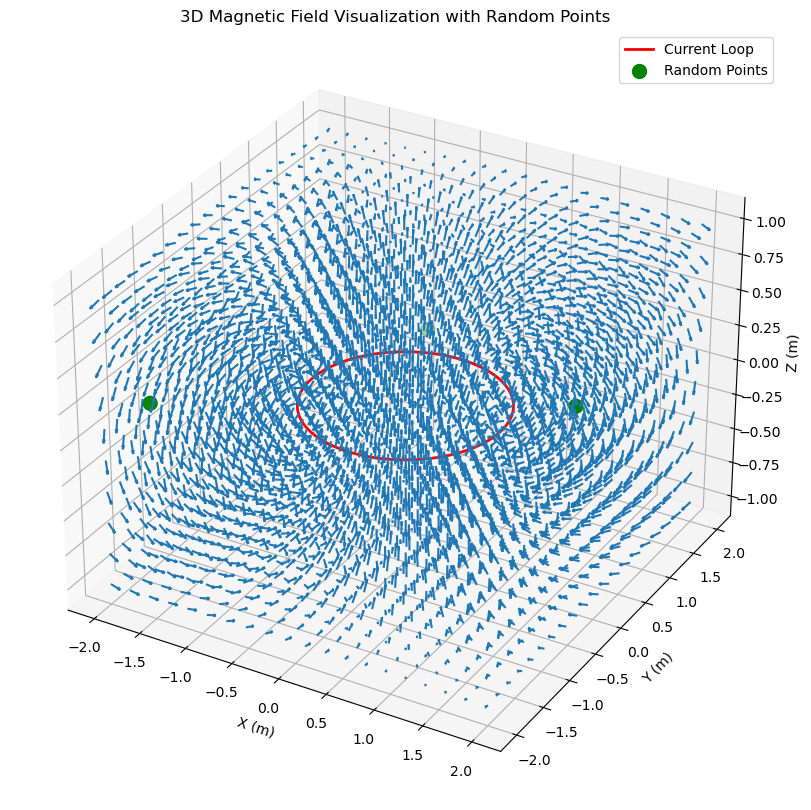

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def biot_savart_law(current_elements, observation_points, mu_0=4*np.pi*1e-7):
    B = np.zeros((len(observation_points), 3))
    
    for j, obs_point in enumerate(observation_points):
        field = np.zeros(3)
        for current_element in current_elements:
            r_vec = obs_point - current_element['pos']
            r_mag = np.linalg.norm(r_vec)
            if r_mag == 0:
                continue  # Avoid singularity at the source of the current element
            dl_cross_r = np.cross(current_element['dl'], r_vec)
            field += mu_0/(4*np.pi) * (current_element['I'] * dl_cross_r) / (r_mag**3)
        
        B[j, :] = field

    return B

# Parameters for the loop
radius = 1.0
current = 10
n_segments = 100

# Define current elements in a circular loop
theta = np.linspace(0, 2*np.pi, n_segments, endpoint=False)
z = 0  # Loop is in the xy-plane at z=0
current_elements = []
loop_points = []  # Collect points to plot the loop

for t in theta:
    pos = np.array([radius * np.cos(t), radius * np.sin(t), z])
    dl = np.array([-np.sin(t), np.cos(t), 0]) * (2 * np.pi * radius / n_segments)
    current_elements.append({'I': current, 'pos': pos, 'dl': dl})
    loop_points.append(pos)

loop_points = np.array(loop_points)

# Create a grid of observation points in 3D
x = np.linspace(-2, 2, 20)
y = np.linspace(-2, 2, 20)
z = np.linspace(-1, 1, 10)
X, Y, Z = np.meshgrid(x, y, z)
obs_points = np.column_stack((X.ravel(), Y.ravel(), Z.ravel()))

# Calculate the magnetic field on the grid
B_grid = biot_savart_law(current_elements, obs_points)
Bx_grid = B_grid[:, 0].reshape(20, 20, 10)
By_grid = B_grid[:, 1].reshape(20, 20, 10)
Bz_grid = B_grid[:, 2].reshape(20, 20, 10)

# Select three random points within the same space as the observation grid
random_points = np.column_stack([
    np.random.uniform(-2, 2, 3),
    np.random.uniform(-2, 2, 3),
    np.random.uniform(-1, 1, 3)
])

# Calculate the magnetic field at the random points
B_random = biot_savart_law(current_elements, random_points)

# Print the results
for i, point in enumerate(random_points):
    print(f"Point {i+1}: {point}, Magnetic Field: {B_random[i]} T")

# 3D Plotting to show the loop and the points
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')
ax.quiver(X, Y, Z, Bx_grid, By_grid, Bz_grid, length=0.1, normalize=True)

# Plotting the loop and random points
ax.plot(loop_points[:, 0], loop_points[:, 1], loop_points[:, 2], 'r-', linewidth=2, label='Current Loop')
ax.scatter(random_points[:, 0], random_points[:, 1], random_points[:, 2], color='g', s=100, label='Random Points')

ax.set_xlabel('X (m)')
ax.set_ylabel('Y (m)')
ax.set_zlabel('Z (m)')
ax.set_title('3D Magnetic Field Visualization with Random Points')
ax.legend()
plt.show()